In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

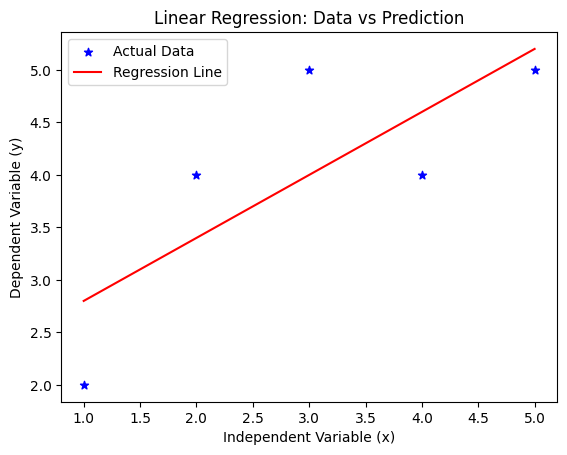

In [9]:
#Simple linear regression: This involves predicting a dependent variable based on a single independent variable.
#In Simple Linear Regression, we have one feature (x) and one response (y). 
#We want to find the line y=β0+β1x that minimizes the error.
#1. The Math Logic: To find the coefficients β1 (slope) and β0 (intercept), we use these formulas:
# β1=SSxy/SSxx
#β0=y−β1x

def calculate_linear_regression(x, y):
    n = np.size(x)
    mean_x, mean_y = np.mean(x), np.mean(y)

    numerator = np.sum(x * y) - n * mean_x * mean_y
    denominator = np.sum(x * x) - n * mean_x * mean_x

    slope = numerator / denominator
    intercept = mean_y - slope * mean_x

    return intercept, slope

#dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])
#calculate values
intercept, slope = calculate_linear_regression(x, y)

# predicted y values cal->uses the formula: y = intercept + slope * x
y_predictions = intercept + slope * x

#plot
plt.scatter(x, y, color="blue", label="Actual Data",marker="*")
plt.plot(x, y_predictions, color="red", label="Regression Line")
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.title("Linear Regression: Data vs Prediction")
plt.legend() # Shows the labels in a box

# Show the plot
plt.show()

Intercept: 151.4300932966009
Slopes (one for each feature): 
[ -30.62219046 -272.2506057   528.85252681  327.69716891 -581.01973841
  332.97061365  -27.97314298  139.28036115  665.07667773   61.90517166]

Variance score (R^2): 0.44


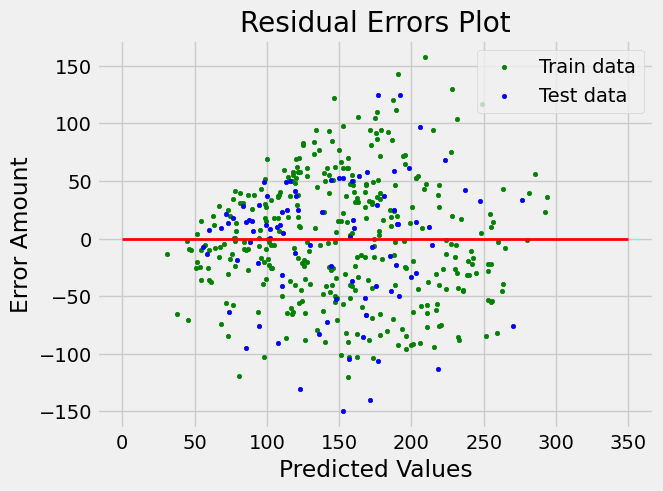

In [15]:
#Multiple linear regression: This involves predicting a dependent variable based on multiple independent variables.
#In multiple regression, the "Slope" becomes a list of Coefficients (one for each feature)


def run_multiple_regression(X_train, y_train):
    
    # Create the model object
    model = linear_model.LinearRegression()
    
    # Train the model using the training sets
    model.fit(X_train, y_train)
    
    return model

diabetes = datasets.load_diabetes()
X = diabetes.data      # Multiple features (age, sex, bmi, etc.)
y = diabetes.target    # The response (disease progression)

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. Calculate Values
model = run_multiple_regression(X_train, y_train)

# 4. Get results
intercept = model.intercept_
slopes = model.coef_

print(f"Intercept: {intercept}")
print(f"Slopes (one for each feature): \n{slopes}")

# 5. Accuracy Check
y_predictions = model.predict(X_test)

#In Machine Learning, the Variance Score (specifically the R2 or R-squared score) is a number that tells you how well your model explains the "variation" in your data
#The score represents the proportion of the dependent variable's variance that is predictable from the independent variables.
#1.0 (100%): Perfect prediction. The model's predictions exactly match the actual data.
#0.0 (0%): The model is doing no better than just guessing the average (mean) value of the dataset.
#Negative Score: The model is performing worse than if you just drew a horizontal line through the average of the data. This usually means the model is a very poor fit.
variance_score = metrics.r2_score(y_test, y_predictions)

print(f"\nVariance score (R^2): {variance_score:.2f}")
# (Note: 1.0 is a perfect prediction)

# Using the y_predictions 
plt.style.use('fivethirtyeight')

# Plotting residual errors
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train,
            color="green", s=10, label='Train data')

plt.scatter(model.predict(X_test), model.predict(X_test) - y_test,
            color="blue", s=10, label='Test data')

# Plotting line for zero error
plt.hlines(y=0, xmin=0, xmax=350, linewidth=2, color="red")

plt.legend(loc='upper right')
plt.title("Residual Errors Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Error Amount")
plt.show()